In [41]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
cloud_config= {'secure_connect_bundle': r'C:\Users\biswa\OneDrive\pred_main\cassandra\secure-connect-jet-engine-rul.zip'}
auth_provider = PlainTextAuthProvider('UcWSmrCpkFeOtCIyQxAYGOSI',
                                      '36TT,OlgrisgZp8L5srzNuIoZzfde,Q6GFzKk,B-G3WrnJxqcD-n2rZlRQ-UYq.aA-qN4mPAcMI9,i-9jJ+Ujt43fe3qTu5gWQuG,12HGZJZkZv9qj8pQ6+LCbyb+QlZ')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)

In [3]:
session = cluster.connect('machine_learning')
session.execute("USE machine_learning;")

In [4]:
col = ["engine", "cycles", "os1", "os2", "os3", "sm1", "sm2", "sm3", "sm4", "sm5", "sm6", "sm7", "sm8", "sm9",
       "sm10", "sm11", "sm12", "sm13", "sm14", "sm15", "sm16", "sm17", "sm18", "sm19", "sm20", "sm21" ]

train4 = pd.DataFrame(session.execute("SELECT * FROM train4fd;")).set_index("slno").sort_index()
train4 = train4.reindex(columns = col)

In [5]:
test4 = pd.DataFrame(session.execute("SELECT * FROM test4fd;")).set_index("slno").sort_index()
test4 = test4.reindex(columns = col)

In [6]:
rul4 = pd.DataFrame(session.execute("SELECT * FROM rul4fd;")).set_index("slno").sort_index()

In [7]:
print(train4.shape)
print(test4.shape)
print(rul4.shape)

(61249, 26)
(41214, 26)
(248, 1)


In [8]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 61249 entries, 0.0 to 61248.0
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  61249 non-null  float64
 1   cycles  61249 non-null  float64
 2   os1     0 non-null      float64
 3   os2     0 non-null      float64
 4   os3     0 non-null      float64
 5   sm1     61249 non-null  float64
 6   sm2     61249 non-null  float64
 7   sm3     61249 non-null  float64
 8   sm4     61249 non-null  float64
 9   sm5     61249 non-null  float64
 10  sm6     61249 non-null  float64
 11  sm7     61249 non-null  float64
 12  sm8     61249 non-null  float64
 13  sm9     61249 non-null  float64
 14  sm10    61249 non-null  float64
 15  sm11    61249 non-null  float64
 16  sm12    61249 non-null  float64
 17  sm13    61249 non-null  float64
 18  sm14    61249 non-null  float64
 19  sm15    61249 non-null  float64
 20  sm16    61249 non-null  float64
 21  sm17    61249 non-null  float

In [9]:
test4.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 41214 entries, 0.0 to 41213.0
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   engine  41214 non-null  float64
 1   cycles  41214 non-null  float64
 2   os1     41214 non-null  float64
 3   os2     41214 non-null  float64
 4   os3     41214 non-null  float64
 5   sm1     41214 non-null  float64
 6   sm2     41214 non-null  float64
 7   sm3     41214 non-null  float64
 8   sm4     41214 non-null  float64
 9   sm5     41214 non-null  float64
 10  sm6     41214 non-null  float64
 11  sm7     41214 non-null  float64
 12  sm8     41214 non-null  float64
 13  sm9     41214 non-null  float64
 14  sm10    41214 non-null  float64
 15  sm11    41214 non-null  float64
 16  sm12    41214 non-null  float64
 17  sm13    41214 non-null  float64
 18  sm14    41214 non-null  float64
 19  sm15    41214 non-null  float64
 20  sm16    41214 non-null  float64
 21  sm17    41214 non-null  float

In [10]:
rul4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rul     248 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [11]:
train4.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,61249.0,124.325181,71.995350,1.000000,60.000000,126.000000,185.000000,249.000000
cycles,61249.0,134.311417,89.783389,1.000000,62.000000,123.000000,191.000000,543.000000
os1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm1,61249.0,472.882433,26.436825,445.000000,445.000000,462.540009,491.190002,518.669983
sm2,61249.0,579.420055,37.342647,535.479980,549.330017,555.739990,607.070007,644.419983
sm3,61249.0,1417.896600,106.167598,1242.670044,1350.550049,1367.680054,1497.420044,1613.000000
sm4,61249.0,1201.915359,119.327590,1024.420044,1119.489990,1136.920044,1302.619995,1440.770020
sm5,61249.0,8.031626,3.622872,3.910000,3.910000,7.050000,10.520000,14.620000


In [12]:
test4.describe().T

,count,mean,std,min,25%,50%,75%,max
engine,41214.0,120.006017,71.685208,1.000000,57.000000,118.000000,181.000000,248.000000
cycles,41214.0,108.739094,83.717459,1.000000,43.000000,91.000000,155.000000,486.000000
os1,41214.0,24.115207,14.714512,0.000000,10.004700,25.001499,41.998100,42.007999
os2,41214.0,0.574724,0.308868,0.000000,0.250700,0.700000,0.840000,0.842000
os3,41214.0,94.072888,14.211218,60.000000,100.000000,100.000000,100.000000,100.000000
sm1,41214.0,472.711614,26.321449,445.000000,445.000000,462.540009,491.190002,518.669983
sm2,41214.0,579.069264,37.129671,535.419983,549.200012,555.539978,606.909973,643.940002
sm3,41214.0,1414.951596,105.423125,1240.939941,1348.589966,1364.630005,1494.989990,1608.050049
sm4,41214.0,1197.321054,118.206367,1024.900024,1116.800049,1130.300049,1299.439941,1429.459961
sm5,41214.0,8.003346,3.602107,3.910000,3.910000,7.050000,10.520000,14.620000


In [13]:
rul4.describe().T

,count,mean,std,min,25%,50%,75%,max
rul,248.0,86.552419,54.634054,6.0,36.0,88.0,126.75,195.0


In [14]:
train4

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,NaN,NaN,NaN,445.000000,549.679993,1343.430054,1112.930054,3.91,...,129.779999,2387.989990,8074.830078,9.3335,0.02,330.0,2212.0,100.00,10.620000,6.367000
1.0,1.0,2.0,NaN,NaN,NaN,491.190002,606.070007,1477.609985,1237.500000,9.35,...,312.589996,2387.729980,8046.129883,9.1913,0.02,361.0,2324.0,100.00,24.370001,14.655200
2.0,1.0,3.0,NaN,NaN,NaN,445.000000,548.950012,1343.119995,1117.050049,3.91,...,129.619995,2387.969971,8066.620117,9.4007,0.02,329.0,2212.0,100.00,10.480000,6.421300
3.0,1.0,4.0,NaN,NaN,NaN,445.000000,548.700012,1341.239990,1118.030029,3.91,...,129.800003,2388.020020,8076.049805,9.3369,0.02,328.0,2212.0,100.00,10.540000,6.417600
4.0,1.0,5.0,NaN,NaN,NaN,462.540009,536.099976,1255.229980,1033.589966,7.05,...,164.110001,2028.079956,7865.799805,10.8366,0.02,305.0,1915.0,84.93,14.030000,8.675400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244.0,249.0,251.0,NaN,NaN,NaN,489.049988,605.330017,1516.359985,1315.280029,10.52,...,380.160004,2388.729980,8185.689941,8.4541,0.03,372.0,2319.0,100.00,29.110001,17.523399
61245.0,249.0,252.0,NaN,NaN,NaN,518.669983,643.419983,1598.920044,1426.770020,14.62,...,535.020020,2388.459961,8185.470215,8.2221,0.03,396.0,2388.0,100.00,39.380001,23.715099
61246.0,249.0,253.0,NaN,NaN,NaN,518.669983,643.679993,1607.719971,1430.560059,14.62,...,535.409973,2388.479980,8193.940430,8.2525,0.03,395.0,2388.0,100.00,39.779999,23.827000


In [15]:
test4

,engine,cycles,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
slno,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,20.007200,0.7000,100.0,491.190002,606.669983,1481.040039,1227.810059,9.35,...,313.029999,2387.780029,8048.979980,9.2229,0.02,362.0,2324.0,100.00,24.309999,14.7007
1.0,1.0,2.0,24.998400,0.6200,60.0,462.540009,536.219971,1256.170044,1031.479980,7.05,...,163.610001,2028.089966,7863.459961,10.8632,0.02,306.0,1915.0,84.93,14.360000,8.5748
2.0,1.0,3.0,42.000000,0.8420,100.0,445.000000,549.229980,1340.130005,1105.880005,3.91,...,129.979996,2387.949951,8071.129883,9.3960,0.02,328.0,2212.0,100.00,10.390000,6.4365
3.0,1.0,4.0,42.003502,0.8402,100.0,445.000000,549.190002,1339.699951,1107.260010,3.91,...,129.479996,2387.899902,8078.890137,9.3594,0.02,328.0,2212.0,100.00,10.560000,6.2367
4.0,1.0,5.0,35.007900,0.8400,100.0,449.440002,555.099976,1353.040039,1117.800049,5.48,...,181.820007,2387.870117,8057.830078,9.3030,0.02,333.0,2223.0,100.00,14.850000,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209.0,248.0,277.0,41.999100,0.8401,100.0,445.000000,550.299988,1364.400024,1129.170044,3.91,...,130.869995,2388.500000,8112.609863,9.4427,0.02,331.0,2212.0,100.00,10.530000,6.2620
41210.0,248.0,278.0,20.002600,0.7005,100.0,491.190002,608.000000,1494.750000,1260.880005,9.35,...,314.510010,2388.330078,8086.830078,9.2772,0.02,366.0,2324.0,100.00,24.330000,14.6486
41211.0,248.0,279.0,34.998798,0.8413,100.0,449.440002,555.919983,1370.650024,1130.969971,5.48,...,182.759995,2388.639893,8100.839844,9.3982,0.02,336.0,2223.0,100.00,14.690000,8.8389


In [16]:
rul4

,rul
slno,
0,22
1,39
2,107
3,75
4,149
...,...
243,35
244,131
245,194


In [17]:
drop_col = ["os1", "os2", "os3", "sm16"]
train4.drop(columns = drop_col, inplace = True)
test4.drop(columns = drop_col, inplace = True)

In [18]:
rul4.insert(0, 'engine', range(1,249))

In [19]:
n_engine = train4['engine'].unique()
print(n_engine)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [20]:
last_cycle_train_engine = train4.groupby(['engine'])['cycles'].count().values
print(last_cycle_train_engine)

[321 299 307 274 193 331 221 230 334 354 301 272 256 253 224 184 151 343
 210 245 227 211 280 186 150 297 163 202 247 297 263 219 201 276 221 143
 388 177 202 206 279 280 223 203 177 321 375 322 446 172 285 357 304 197
 344 347 193 281 177 218 244 297 170 184 351 175 167 163 226 185 312 308
 181 244 230 152 148 250 218 305 187 197 184 159 277 232 259 388 168 212
 354 191 196 249 239 270 262 245 167 261 260 194 224 203 170 266 183 304
 325 186 297 340 184 161 131 344 342 543 187 177 194 174 226 170 239 302
 235 248 190 166 370 254 489 247 149 205 225 178 251 298 199 209 184 297
 228 303 234 193 261 149 351 262 168 203 295 139 298 399 288 187 303 313
 285 380 255 269 263 196 227 161 399 273 457 370 156 180 242 170 435 344
 134 205 190 379 259 163 273 254 239 381 297 190 197 145 159 174 170 164
 176 225 378 241 324 211 242 263 379 290 161 167 146 229 197 128 361 244
 200 236 190 202 274 202 247 268 418 194 287 279 280 250 194 273 289 207
 199 225 212 187 365 149 332 222 327 267 205 161 21

In [21]:
last_cycle_train_engine = train4.groupby(['engine'])['cycles'].count().values
print(last_cycle_train_engine)

[321 299 307 274 193 331 221 230 334 354 301 272 256 253 224 184 151 343
 210 245 227 211 280 186 150 297 163 202 247 297 263 219 201 276 221 143
 388 177 202 206 279 280 223 203 177 321 375 322 446 172 285 357 304 197
 344 347 193 281 177 218 244 297 170 184 351 175 167 163 226 185 312 308
 181 244 230 152 148 250 218 305 187 197 184 159 277 232 259 388 168 212
 354 191 196 249 239 270 262 245 167 261 260 194 224 203 170 266 183 304
 325 186 297 340 184 161 131 344 342 543 187 177 194 174 226 170 239 302
 235 248 190 166 370 254 489 247 149 205 225 178 251 298 199 209 184 297
 228 303 234 193 261 149 351 262 168 203 295 139 298 399 288 187 303 313
 285 380 255 269 263 196 227 161 399 273 457 370 156 180 242 170 435 344
 134 205 190 379 259 163 273 254 239 381 297 190 197 145 159 174 170 164
 176 225 378 241 324 211 242 263 379 290 161 167 146 229 197 128 361 244
 200 236 190 202 274 202 247 268 418 194 287 279 280 250 194 273 289 207
 199 225 212 187 365 149 332 222 327 267 205 161 21

In [22]:
last_cycle_test_engine = test4.groupby(['engine'])['cycles'].count().values
print(last_cycle_test_engine)

[230 153 141 208  51 146  54 248 284  23  82 270 227 102 168 240 334 247
  24 115 202 158 162 174 486  90 144  20 216 229 134 260 107 361 278 159
 345 125 214 266 414 200 120 406  78  37 224 214 273 206 137  58  67  81
 103 180 121 185  37 135 396 240 158 251 186  97 150 241 162 190 292 118
 149 223 203  48 108 106 184 112  60 146 274  88 174 254 167 140 285 118
 144 116 200 105 110 123  51  82 237 196 166 443 145  65 351 148 121 145
  66 348 342  88 132 218  82 161  97 178 228 170 194 117 236 230  21 220
  98 139 315 107 193 115  74 266 435  56 291 239  88 160  19  69 327  34
 102  84 116 126 320 202 285 195 130 122 161  28 138 171 160 122 257  99
 122  29 178  63  99  74  34  48 355 132 151 135 116 185 146 279 262 367
 199  98 125 154 203  47 121 157 107 200  71 203 263 214 186  70 196 115
 177 115 139 222  87  19  95 291 179 180 171 135 206 261 288 102  72 264
 141  63 110  65 176 178 305 152  39  59  62 126  20 157 230 370 111 179
 362 176 221 177  28 204  42 112 199 184  63  29  9

In [23]:
print(list(rul4['rul']))

[22, 39, 107, 75, 149, 78, 94, 14, 99, 162, 143, 7, 71, 105, 12, 160, 162, 104, 194, 82, 91, 11, 26, 142, 39, 92, 76, 124, 64, 118, 6, 22, 147, 126, 36, 73, 89, 11, 151, 10, 97, 30, 42, 60, 85, 134, 34, 45, 24, 86, 119, 151, 142, 176, 157, 67, 97, 8, 154, 139, 51, 33, 184, 46, 12, 133, 46, 46, 12, 33, 15, 176, 23, 89, 124, 163, 25, 74, 78, 114, 96, 10, 172, 166, 115, 70, 94, 56, 86, 96, 50, 73, 154, 129, 171, 71, 105, 113, 37, 7, 13, 22, 9, 120, 100, 107, 41, 153, 126, 59, 18, 66, 13, 14, 139, 13, 75, 8, 109, 137, 41, 192, 23, 86, 184, 15, 195, 126, 120, 165, 101, 116, 126, 36, 7, 122, 159, 88, 173, 146, 130, 108, 53, 162, 59, 100, 56, 145, 76, 57, 31, 88, 173, 34, 7, 133, 172, 6, 22, 83, 82, 84, 95, 174, 111, 72, 109, 87, 179, 158, 126, 12, 8, 10, 123, 103, 12, 106, 12, 32, 37, 116, 15, 10, 46, 142, 24, 135, 56, 43, 178, 71, 104, 15, 166, 89, 36, 11, 92, 96, 59, 13, 167, 151, 154, 109, 116, 91, 11, 88, 108, 76, 14, 89, 145, 17, 66, 154, 41, 182, 73, 39, 58, 14, 145, 88, 162, 189, 120,

In [24]:
rul_cycle = list(rul4['rul'])
max_cycle = pd.DataFrame(rul_cycle) + pd.DataFrame(test4.groupby(['engine'])['cycles'].count().values)
max_cycle.insert(0, 'engine', range(1, 1 + len(max_cycle[0])))
max_cycle.rename(columns = {0:'max_cycle'} , inplace = True)
max_cycle

,engine,max_cycle
0,1,252
1,2,192
2,3,248
3,4,283
4,5,200
...,...,...
243,244,219
244,245,194
245,246,223
246,247,206


In [25]:
test4 = test4.merge(max_cycle, on = ['engine'], how = 'left')
test4['rul'] = test4['max_cycle'] - test4['cycles']

In [26]:
def remain_rul(max_cycle):
    rul = np.arange(max_cycle-1, -1, -1)
    return rul

In [27]:
all_cycle = []
for max_cycle in last_cycle_train_engine:
    all_cycle = all_cycle + list(remain_rul(max_cycle))

all_cycle = pd.DataFrame(all_cycle, columns = ['rul'])

In [28]:
train4 = pd.concat([train4, all_cycle], axis = 1)

<AxesSubplot: >

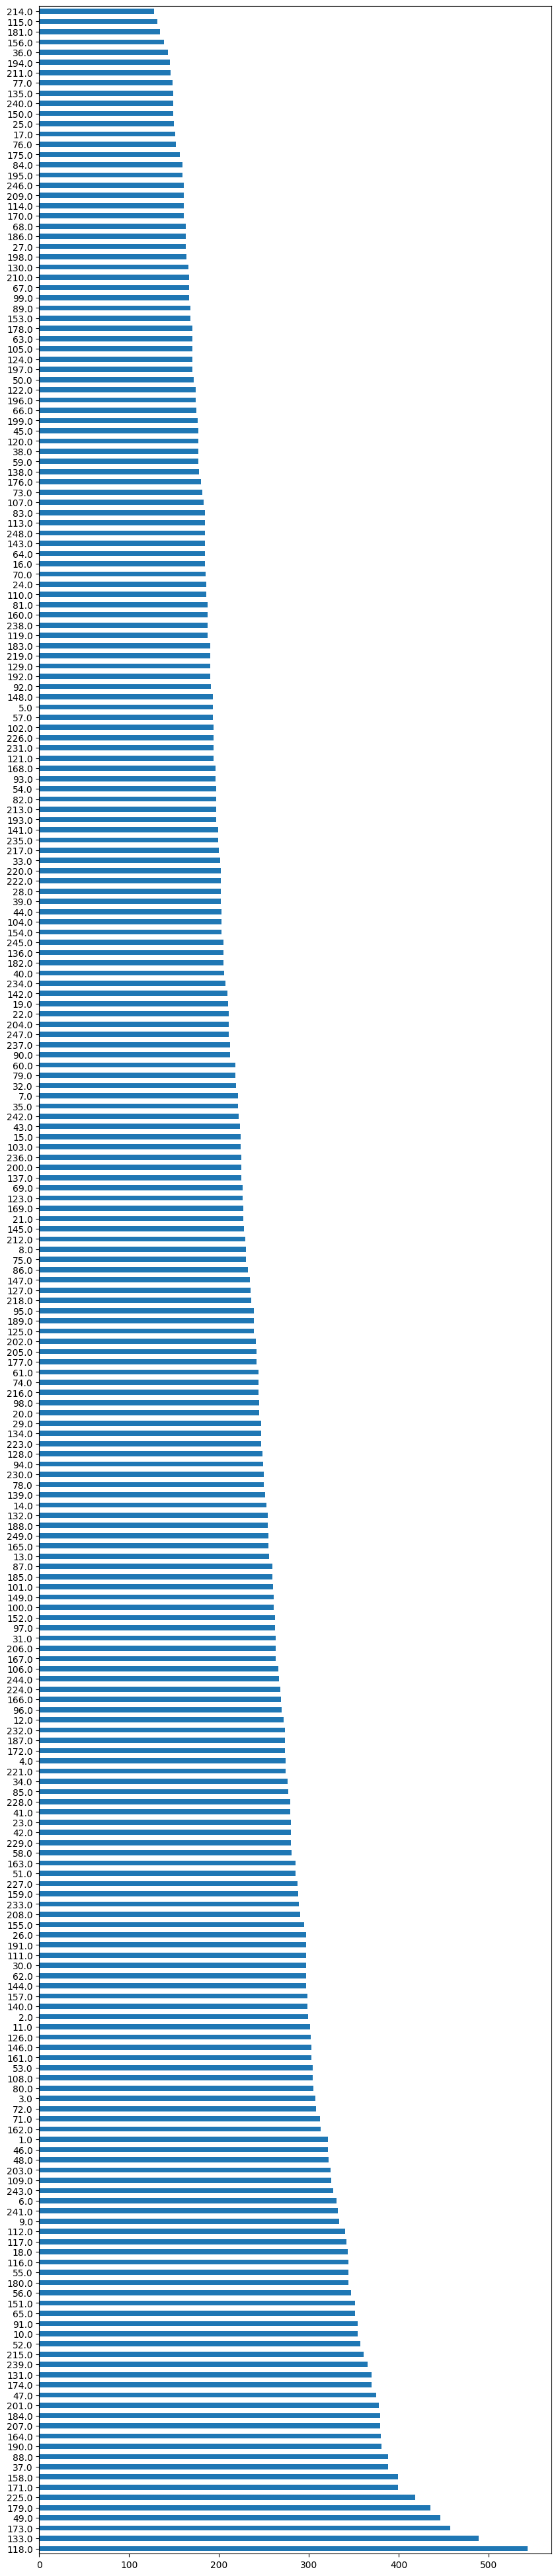

In [29]:
train4['engine'].value_counts().plot(kind='barh', figsize=(10,50))

<AxesSubplot: >

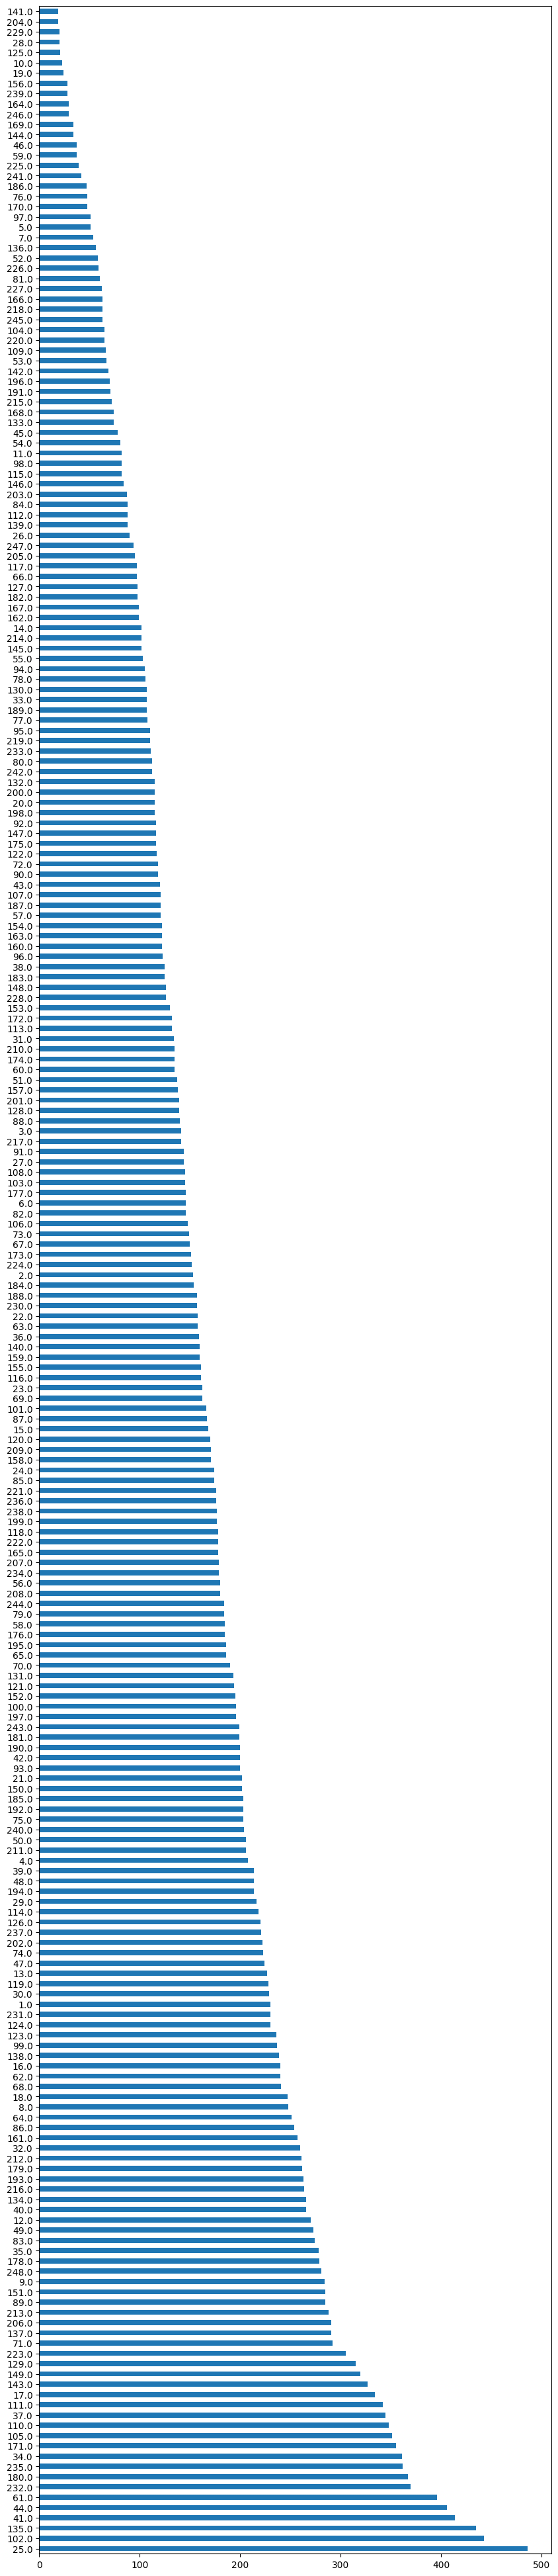

In [30]:
test4['engine'].value_counts().plot(kind = 'barh', figsize = (10,50))

In [31]:
num_engines = list(test4['engine'].unique())
print(num_engines)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 1

In [32]:
data = []
for i in np.arange(1, len(num_engines) + 1):
    temp_test_data = test4[test4['engine'] == i].drop(columns = ['max_cycle']).values
    data.append(temp_test_data[-1])

coln = list(test4.columns.drop('max_cycle'))
test4_pre = pd.DataFrame(data, columns = coln)

In [33]:
train4.columns

Index(['engine', 'cycles', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7',
       'sm8', 'sm9', 'sm10', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17',
       'sm18', 'sm19', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [34]:
test4_pre.columns

Index(['engine', 'cycles', 'sm1', 'sm2', 'sm3', 'sm4', 'sm5', 'sm6', 'sm7',
       'sm8', 'sm9', 'sm10', 'sm11', 'sm12', 'sm13', 'sm14', 'sm15', 'sm17',
       'sm18', 'sm19', 'sm20', 'sm21', 'rul'],
      dtype='object')

In [35]:
rul4.columns

Index(['engine', 'rul'], dtype='object')

In [36]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(train4.drop(columns = ['engine','cycles','rul']))
y_train = train4['rul']
x_test = scaler.transform(test4_pre.drop(columns = ['engine','cycles','rul']))
y_test = rul4['rul']

In [37]:
rf_model = RandomForestRegressor(n_estimators= 400, max_features = "log2",
                                 n_jobs = -1, random_state = 38)
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)

In [38]:
print('Train Accuracy:', np.floor(100*(rf_model.score(x_train, y_train))))

r2 = np.floor(100 *(r2_score(y_test, predictions)))
print('Coefficient of determination:', r2)

mse =  mean_squared_error(y_test, predictions)
RMSE = np.ceil(np.sqrt(mse))

print("RMSE: ", RMSE)

Train Accuracy: 94.0
Coefficient of determination: 42.0
RMSE:  42.0


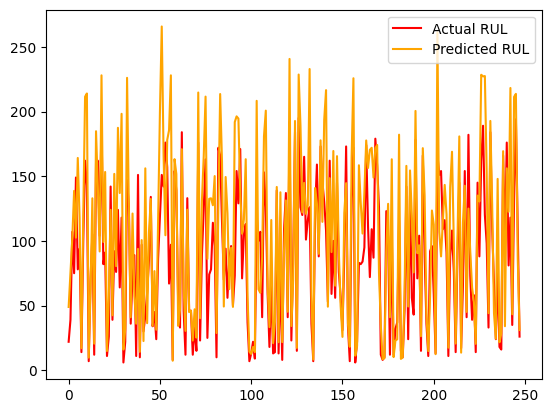

In [39]:
plt.plot(y_test, label = "Actual RUL", color = "red")
plt.plot(predictions, label = "Predicted RUL", color = "orange")
plt.legend()
plt.show()

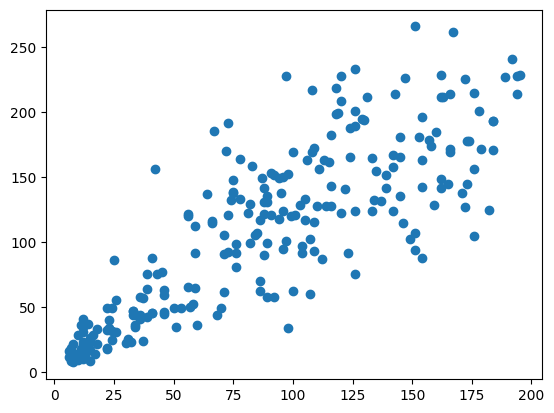

In [40]:
plt.scatter(y_test,predictions)
plt.show()

In [42]:
filename = "fd4.pkl"
pickle.dump(rf_model, open(filename,"wb"))